FITS files
==========

This example uses `astropy.io` to load image data from three different narrow-band filters and combine them into a single color image.  Data files are available from  the [ESA/Hubble site](http://www.spacetelescope.org/projects/fits_liberator/eagledata/).

To use this notebook, download and unzip the three FITS files [here](http://www.spacetelescope.org/projects/fits_liberator/eagledata/): [502nmos.zip](http://www.spacetelescope.org/static/projects/fits_liberator/datasets/eagle/502nmos.zip), [656nmos.zip](http://www.spacetelescope.org/static/projects/fits_liberator/datasets/eagle/656nmos.zip), [673nmos.zip](http://www.spacetelescope.org/static/projects/fits_liberator/datasets/eagle/673nmos.zip).

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Get the primary HDU header as a local dictionary-like object:

In [2]:
hdr = fits.getheader('673nmos.fits')
print hdr.keys()[:12]

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'BSCALE', 'BZERO', 'OPSIZE', 'ORIGIN', 'FITSDATE', 'FILENAME']


There are many more header fields available.  They can be referenced by name (note that keys are case-insensitive):

In [3]:
print hdr['DATE-OBS']
print hdr['time-obs']

 1/04/95
18:42:17


or by index:

In [4]:
print hdr[10]
print hdr[11]

2005-07-01
673nmos_cvt.hhh


In [5]:
fit = fits.open('673nmos.fits')
print fit

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x10c8c2cd0>, <astropy.io.fits.hdu.table.TableHDU object at 0x10c8c2d10>]


The primary HDU object (which contains the image data) is now in `fit[0]`.  We can switch the vertical and horizontal axes to see the image in its usual orientation.

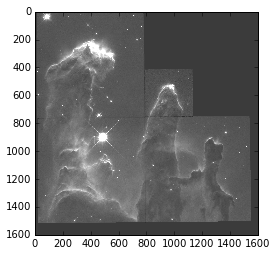

In [6]:
sii = fit[0].data
ax = plt.imshow(sii.T, cmap='gray', vmax=50)

Next we load the raw data for all three color filters into a dictionary of numpy arrays.

In [7]:
data = {}
colors = {'SII':673, 'Ha':656, 'OIII':502}
for color, filt in colors.items():
    filename = '{}nmos.fits'.format(filt)
    fit = fits.open(filename)
    data[color] = fit[0].data.T
data.keys()

['SII', 'Ha', 'OIII']

Create a simple helper function to normalize our data arrays to the range (0.0, 1.0).  For better visualization, we will also clip the extreme data values.

In [8]:
def scale(array):
    percent = 99
    mx = np.percentile(array, percent)
    norm = array / mx
    norm[norm > 1.0] = 1.0
    return norm

Next, combine the three data arrays into a single $N \times N \times 3$ array that will be interpreted as colors.  The false color image uses the HST mapping of the SII, H$_\alpha$, and OIII bands to red, green, and blue, respectively (from longest to shortest wavelengths).

In [9]:
i = np.dstack((scale(data['SII']), scale(data['Ha']), scale(data['OIII'])))
i.shape

(1600, 1600, 3)

Plot the histogram of the H$_\alpha$ image data values before and after normalization:

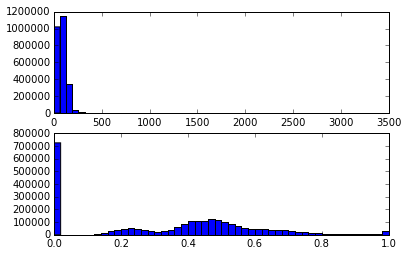

In [10]:
plt.subplot(211)
n, bins, patches = plt.hist(data['Ha'].flatten(), 50)
plt.subplot(212)
n, bins, patches = plt.hist(i[:,:,1].flatten(), 50)

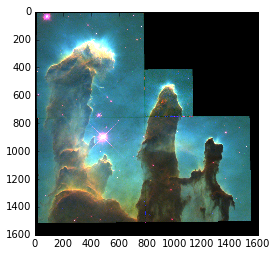

In [11]:
ax = plt.imshow(i)

The secondary HDU in these data files is a FITS table.  These can be accessed as NumPy structured arrays.

In [12]:
table = fit[1]
print table

Get the name and value for each field in the table:

In [13]:
names = table.columns.names
print names
values = [table.data.field(name) for name in names]
for name, value in zip(names, values):
    print name, value

['CRVAL1', 'CRVAL2', 'CRPIX1', 'CRPIX2', 'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'DATAMIN', 'DATAMAX', 'MIR_REVR', 'ORIENTAT', 'FILLCNT', 'ERRCNT', 'FPKTTIME', 'LPKTTIME', 'CTYPE1', 'CTYPE2', 'DETECTOR', 'DEZERO', 'BIASEVEN', 'BIASODD', 'GOODMIN', 'GOODMAX', 'DATAMEAN', 'GPIXELS', 'SOFTERRS', 'CALIBDEF', 'STATICD', 'ATODSAT', 'DATALOST', 'BADPIXEL', 'OVERLAP', 'PHOTMODE', 'PHOTFLAM', 'PHOTZPT', 'PHOTPLAM', 'PHOTBW', 'MEDIAN', 'MEDSHADO', 'HISTWIDE', 'SKEWNESS', 'MEANC10', 'MEANC25', 'MEANC50', 'MEANC100', 'MEANC200', 'MEANC300', 'BACKGRND']
CRVAL1 [ 274.71130937]
CRVAL2 [-13.81600063]
CRPIX1 [ 386.5]
CRPIX2 [ 396.]
CD1_1 [  1.87801306e-05]
CD1_2 [ -2.03119307e-05]
CD2_1 [ -2.02935807e-05]
CD2_2 [ -1.87971109e-05]
DATAMIN [ 0.]
DATAMAX [ 0.]
MIR_REVR ['T']
ORIENTAT [-131.91149902]
FILLCNT [0]
ERRCNT [0]
FPKTTIME [ 49808.86370437]
LPKTTIME [ 49808.86387219]
CTYPE1 ['RA---TAN']
CTYPE2 ['DEC--TAN']
DETECTOR [4]
DEZERO [ 311.28829956]
BIASEVEN [ 311.32580566]
BIASODD [ 311.25088501]
GOODMIN [-1